<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/day1.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Regression_DGI

In [5]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline

In [11]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/DGI-Lab/master/"
os.makedirs(data_path, exist_ok=True)
for filename in ("JeuDonnees.xlsx", "REPARTITION_CAPITAL_VF.xlsx"):
    print("Downloading", filename)
    url = download_path + "day1/datasets/" + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [12]:
df = pd.read_excel(data_path + 'JeuDonnees.xlsx', sheet_name='Feuil1', index_col=0)

In [13]:
df.head()

,RS,CA N-2,CA N-1,CA N,CA Recoupé N,Actif Immobilisé N-1,Actif Immobilisé N-2,Valeur ajoutée N,Résultat Non courants N,Capital N-1,Capital N-2,Compte courant d'associé N,Total des provisions N,Total des charges N,Résultat Fiscal N,Impot sur les sociétés N,TVA payée N,IR/Salaires N
IF,,,,,,,,,,,,,,,,,,
1,A1,7178441,7814773,6851155,11767321,302559,288373,882728,5995172,888847,882068,623598,4249352,7462131,-610976,342557.75,6851155,163170.00
2,A2,21932352,14729361,37572976,66171702,1428986,4680364,2969267,17709267,5974690,5452345,2148813,6099573,40904080,-3331104,1878648.80,37572976,4296043.00
3,A3,88384108,128385712,133057855,160404401,6326353,10501838,26390109,-36615009,26425988,14586791,5054016,131395152,144263655,-11205800,6652892.75,133057855,5269547.25
4,A4,235255933,659113375,976680022,1065571940,87470874,33041673,104702196,-593617798,190893505,190093454,147614055,372204189,882736427,93943595,48834001.10,976680022,47191497.25
5,A5,9104143,6695557,5231630,12396321,360550,299936,926273,4525974,703165,751733,460982,3979404,4983471,248159,261581.50,5231630,190195.75


In [14]:
df.describe()

,CA N-2,CA N-1,CA N,CA Recoupé N,Actif Immobilisé N-1,Actif Immobilisé N-2,Valeur ajoutée N,Résultat Non courants N,Capital N-1,Capital N-2,Compte courant d'associé N,Total des provisions N,Total des charges N,Résultat Fiscal N,Impot sur les sociétés N,TVA payée N,IR/Salaires N
count,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03
mean,1.928041e+08,1.911827e+08,1.923153e+08,2.122767e+08,1.882284e+07,1.905904e+07,2.395139e+07,-2.754075e+05,2.886619e+07,2.891582e+07,1.590982e+07,9.662202e+07,1.925688e+08,-2.534810e+05,9.615767e+06,1.923153e+08,1.317276e+07
std,2.697892e+08,2.683275e+08,2.711450e+08,2.851866e+08,2.676171e+07,2.724086e+07,3.651655e+07,1.926918e+08,4.190926e+07,4.204712e+07,2.668500e+07,1.656586e+08,2.723574e+08,1.925295e+07,1.355725e+07,2.711450e+08,2.149673e+07
min,5.000438e+06,5.002290e+06,5.001125e+06,3.268412e+06,1.001390e+05,1.000330e+05,2.616350e+05,-9.801179e+08,5.121050e+05,5.083670e+05,6.514900e+04,8.140000e+02,4.579121e+06,-9.716623e+07,2.500562e+05,5.001125e+06,6.294900e+04
25%,1.000404e+07,1.000496e+07,1.000507e+07,1.750922e+07,5.023565e+05,4.999285e+05,1.485991e+06,-2.204094e+07,1.737405e+06,1.723807e+06,9.352682e+05,5.391129e+06,1.050479e+07,-2.171462e+06,5.002534e+05,1.000507e+07,8.060201e+05
50%,4.998463e+07,4.997625e+07,4.995815e+07,6.917574e+07,4.996086e+06,4.997850e+06,6.666338e+06,9.016500e+03,7.981138e+06,7.942517e+06,3.929723e+06,2.197446e+07,5.114812e+07,6.640000e+02,2.497907e+06,4.995815e+07,3.413832e+06
75%,1.997647e+08,1.999118e+08,1.999741e+08,2.319200e+08,1.998434e+07,1.998616e+07,2.802436e+07,2.175278e+07,3.296948e+07,3.280445e+07,1.728882e+07,1.020649e+08,2.071148e+08,2.198981e+06,9.998707e+06,1.999741e+08,1.447658e+07
max,9.997155e+08,9.996370e+08,9.989487e+08,1.084956e+09,9.999430e+07,9.990485e+07,1.946946e+08,9.861032e+08,1.956509e+08,1.963015e+08,1.822010e+08,9.808801e+08,1.092304e+09,9.581818e+07,4.994743e+07,9.989487e+08,1.303689e+08


## Histograme

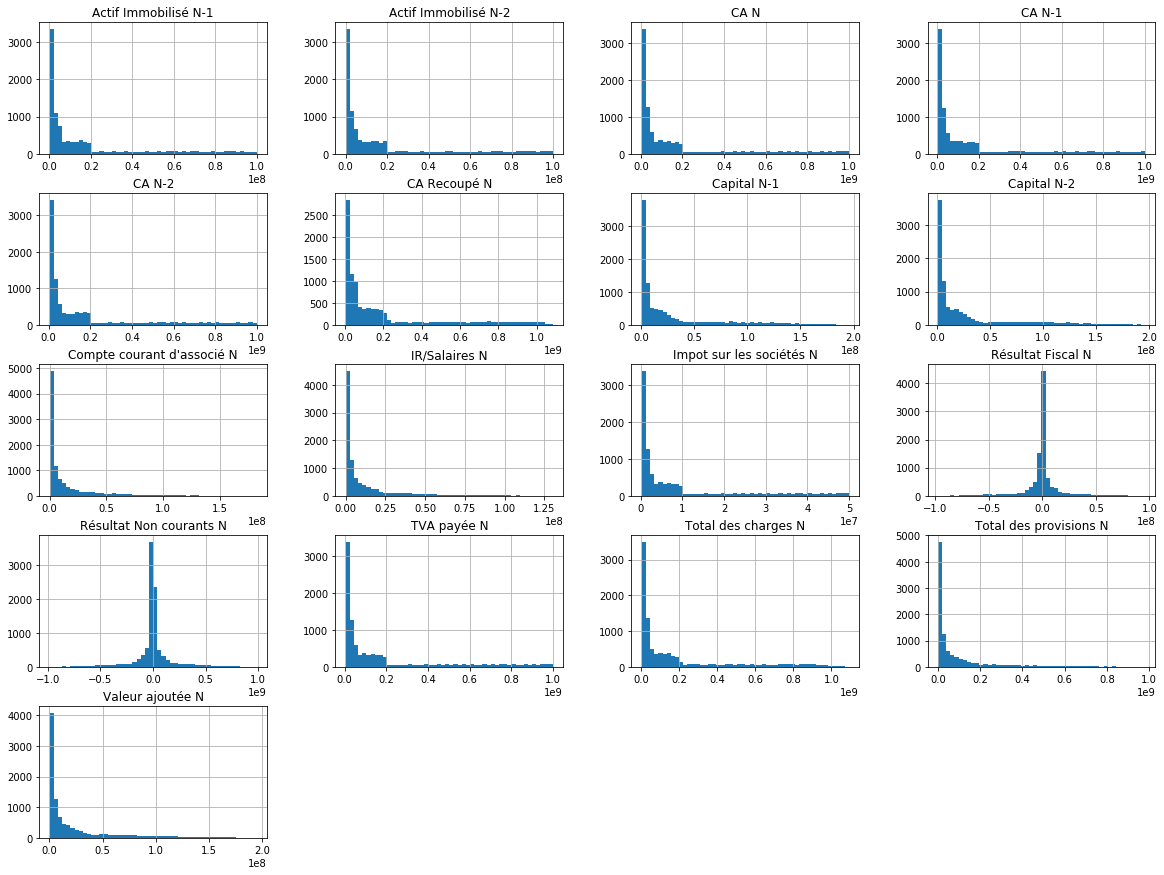

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

## Correlation

In [17]:
corr_matrix = df.corr()

In [18]:
corr_matrix["Actif Immobilisé N-2"].sort_values(ascending=False)

Actif Immobilisé N-2          1.000000
CA Recoupé N                  0.818607
CA N-2                        0.811063
Impot sur les sociétés N      0.810932
CA N                          0.810932
TVA payée N                   0.810932
Total des charges N           0.809169
CA N-1                        0.808611
Actif Immobilisé N-1          0.806623
Capital N-1                   0.787929
Capital N-2                   0.787409
Valeur ajoutée N              0.748932
IR/Salaires N                 0.705172
Compte courant d'associé N    0.674843
Total des provisions N        0.673093
Résultat Non courants N       0.006712
Résultat Fiscal N            -0.026117
Name: Actif Immobilisé N-2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ad55eb8>,
      dtype=object)

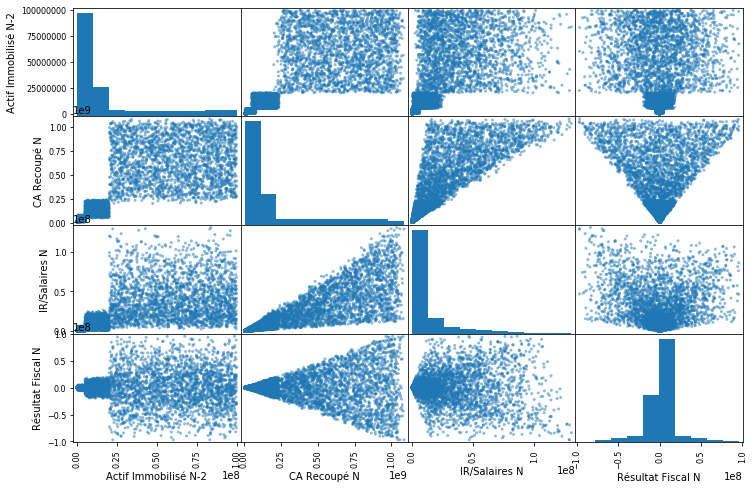

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["Actif Immobilisé N-2", "CA Recoupé N", "IR/Salaires N","Résultat Fiscal N"]

scatter_matrix(df[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bd42cc0>,
      dtype=object)

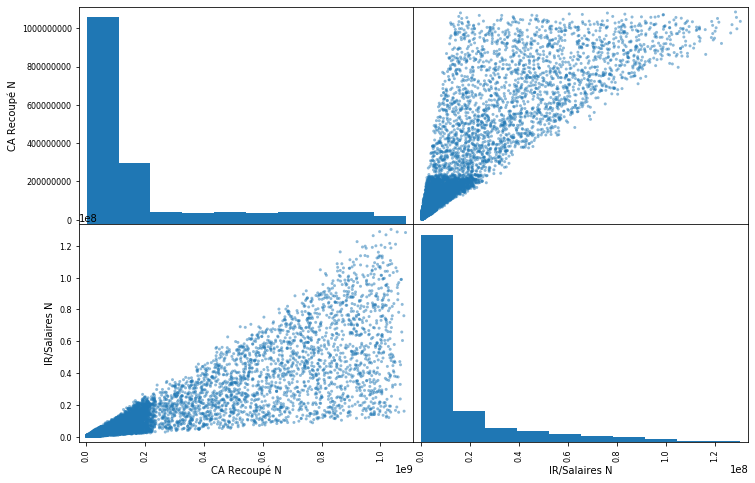

In [25]:
from pandas.plotting import scatter_matrix

attributes = [ "CA Recoupé N", "IR/Salaires N"]

scatter_matrix(df[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

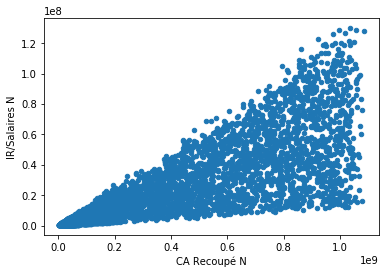

In [26]:
df.plot(kind="scatter", x="CA Recoupé N", y="IR/Salaires N")

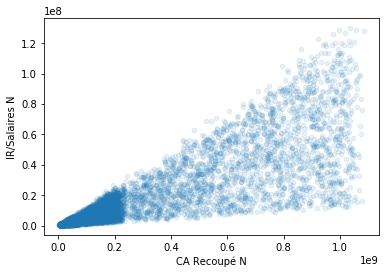

In [27]:
df.plot(kind="scatter", x="CA Recoupé N", y="IR/Salaires N", alpha=0.1)

## Split Data

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [41]:
train_X = np.c_[train_set["CA Recoupé N"]]
train_y = np.c_[train_set["IR/Salaires N"]]

test_X = np.c_[test_set["CA Recoupé N"]]
test_y = np.c_[test_set["IR/Salaires N"]]

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
from sklearn.metrics import mean_squared_error

predict_y = lin_reg.predict(test_X)
lin_mse = mean_squared_error(predict_y, test_y)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11016795.43067533

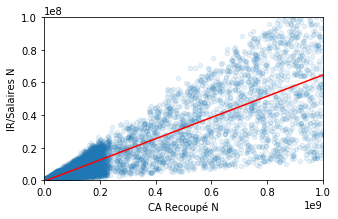

In [49]:
#model parameters
theta0, theta1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]

#plot
df.plot(kind="scatter", x="CA Recoupé N", y="IR/Salaires N", alpha=0.1, figsize=(5,3))

plt.axis([0, 1e9, 0, 1e8])
train_X=np.linspace(0, 1e9, 1000)
plt.plot(train_X, theta0 + theta1*train_X, "r")

plt.show()